# Ejercicio 5

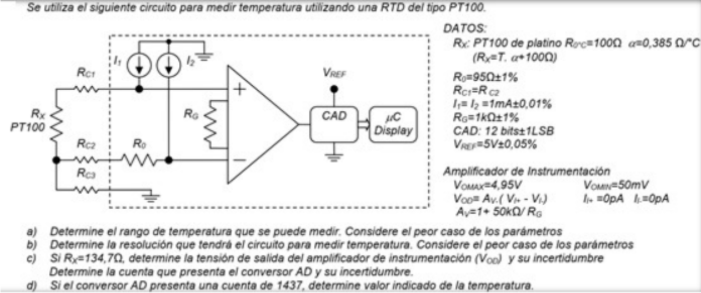

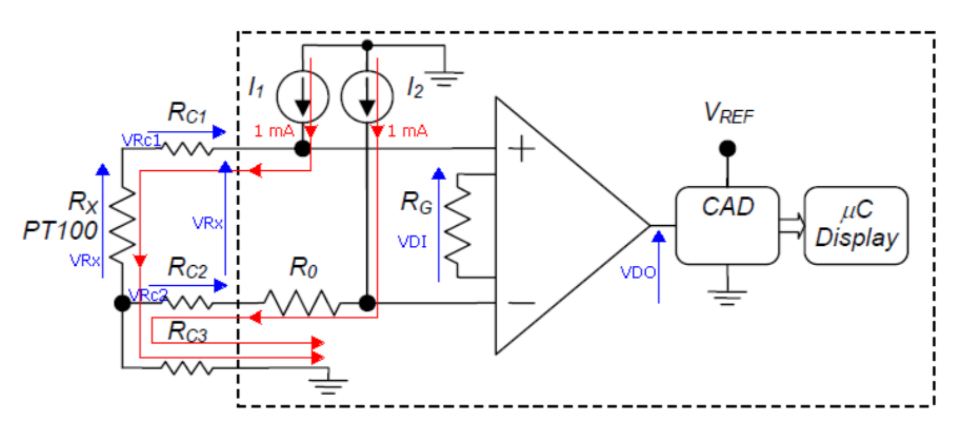

### Parte A

Ecuaciones que rigen la medicion:

- $R_x = R_{0°C} + \alpha~.~T~~~~(1)$
- $V_{DI} = I~.~(R_x - R_0)~~~~(2)$
- $V_{DO} = V_{DI}~.~A_v~~~~(3)$
- $A_v = 1 + \frac{50~k\Omega}{R_G}~~~~(4)$

Cuentas indicadas:

- $C_i = 2^N~.~\frac{V_{OD}}{V_{REF}}~~~~(5)$

De (2):

$$
R_x = \frac{V_{DI}}{I} + R_{0} 
$$

Remplazando $V_{DI}$ con (3):

$$
R_x = \frac{V_{OD}}{I~.~A_v} + R_{0} 
$$

Remplazando $A_v$ con (4):

$$
R_x = \frac{V_{OD}}{I~.~(1 + \frac{50~k\Omega}{R_G})} + R_{0}~~~~(6)
$$

De (1):

$$
T = \frac{R_x - R_{0°C}}{\alpha}
$$

Remplazando $R_x$ con (6):

$$
T = \frac{\frac{V_{OD}}{I~.~(1 + \frac{50~k\Omega}{R_G})} + R_{0} - R_{0°C}}{\alpha}~~\to~~T = \frac{1}{\alpha}~.~[\frac{V_{OD}}{I~.~(1 + \frac{50~k\Omega}{R_G})} + R_{0} - R_{0°C}]
$$

Siendo el peor caso posible el caso en el cual el rango se encuentre entre la temperatura superior mínima y la temperatura inferior máxima.

Para la temperatura superior minima:

$$
R_{0min} = 95~\Omega - 1\% = 94,05~\Omega
$$

$$
R_{Gmin} = 1~k\Omega - 1\% = 990~\Omega
$$

$$
I_{max} = 1~mA + 0,01\% = 1,0001~mA 
$$

$$
V_{OD} = V_{OMAX} = 4,95~V
$$

In [1]:
R0_MIN = 94.05       #[ohm]
RG_MIN = 990         #[ohm]
R0C    = 100         #[ohm]
ALPHA  = 0.385       #[ohm/°C]
I_MAX  = 1.0001e-3   #[A]
VOMAX  = 4.95        #[V]

t_min = ( 1 / ALPHA ) * ( ( VOMAX / ( I_MAX * ( 1 + ( 50e3 / RG_MIN ) ) ) ) + R0_MIN - R0C )
print("La temperatura superior minima es: {} °C".format(t_min))

La temperatura superior minima es: 234.14927291575376 °C


Para la temperatura inferior maxima:

$$
R_{0max} = 95~\Omega + 1\% = 95,95~\Omega
$$

$$
R_{Gmax} = 1~k\Omega - 1\% = 1010~\Omega
$$

$$
I_{min} = 1~mA - 0,01\% = 0,9999~mA 
$$

$$
V_{OD} = V_{OMIN} = 50~mV
$$

In [2]:
R0_MAX = 95.95        #[ohm]
RG_MAX = 1010         #[ohm]
I_MIN  = 0.9999e-3    #[A]
VOMIN  = 50e-3        #[V]

t_max = ( 1 / ALPHA ) * ( ( VOMIN / ( I_MIN * ( 1 + ( 50e3 / RG_MAX ) ) ) ) + R0_MAX - R0C )
print("La temperatura inferior maxima es: {} °C".format(t_max))

La temperatura inferior maxima es: -7.947789687020855 °C


Por lo tanto, el rango medible sera:

$$
-7,947789687~°C < T < 234,1492729~°C
$$

### Parte B

Siendo la resolucion de temperatura:

$$
\Delta T = T(C_a) - T(C_a - 1)
$$

$$
\Delta T = \frac{1}{\alpha}~.~[\frac{C_a~.~V_{REF}}{I~.~2^N~.~(1 + \frac{50~k\Omega}{R_G})} + R_{0} - R_{0°C} - \frac{(C_a - 1)~.~V_{REF}}{I~.~2^N~.~(1 + \frac{50~k\Omega}{R_G})} - R_{0} + R_{0°C}]
$$

$$
\Delta T = \frac{1}{\alpha}~.~\frac{V_{REF_{MAX}}}{I_{min}~.~2^N~.~(1 + \frac{50~k\Omega}{R_GMAX})}
$$

In [3]:
VREF_MAX = 5.0025    #[V]
N        = 12        #[bits]

deltaT = ( 1 / ALPHA) * ( VREF_MAX / ( I_MIN * 2 ** N * ( 1 + ( 50e3 / RG_MAX ) ) ) )
print("La resolucion del circuito es: {} °C".format(deltaT))

La resolucion del circuito es: 0.06281681342470448 °C


### Parte C

Siendo:

$$
V_{OD} = I~.~(1 + \frac{50~k\Omega}{R_g})~.~(R_x - R_0)
$$

In [4]:
I  = 1e-3     #[A]
RG = 1e3      #[ohm]
RX = 134.7    #[ohm]
R0 = 95       #[ohm]

vod = I * ( 1 + ( 50e3 / RG ) ) * ( RX - R0 )
print("La salida de tension del amplificador de de instrumentacion Vod es: {} V".format(vod))

La salida de tension del amplificador de de instrumentacion Vod es: 2.0246999999999997 V


Siendo la incertidumbre de $V_{DO}$:

$$
u(V_{OD}) = \sqrt{(\frac{\partial V_{OD}}{\partial I})^2~.~u^2(I) + (\frac{\partial V_{OD}}{\partial R_g})^2~.~u^2(R_g) + (\frac{\partial V_{OD}}{\partial R_0})^2~.~u^2(R_0)}
$$

$$
u(V_{OD}) = \sqrt{((1 + \frac{50~k\Omega}{R_g})~.~(R_x - R_0))^2~.~u^2(I) + (\frac{-I~.~50~k\Omega~.~(R_X - R_0)}{R^2_G})^2~.~u^2(R_g) + (-I~.~(1 + \frac{50~k\Omega}{R_G}))^2~.~u^2(R_0)}
$$

In [9]:
from math import sqrt

U_I  = ( 10e-7 / sqrt(3) )    #[A]
U_RG = ( 5 / sqrt(3) )        #[ohm]
U_R0 = ( 0.495 / sqrt(3) )    #[ohm]

K = 2

a = (1 + ( 50e3 / RG ) ) * ( RX - R0 )
b = ( -I * 50e3 * ( RX - R0 ) ) / RG ** 2
c = ( -I * ( 1 + ( 50e3 / RG ) ) )

u_vod = sqrt( a ** 2 * U_I ** 2 + b ** 2 * U_RG ** 2 + c ** 2 * U_R0 ** 2 )
U_vod = u_vod * K

print("El valor de la incertidumbre combinada de la tension del amplificador de instrumentacion Vod es: {} V".format(u_vod))
print("El valor de la incertidumbre expandida de la tension del amplificador de instrumentacion Vod es: {} V".format(U_vod))

El valor de la incertidumbre combinada de la tension del amplificador de instrumentacion Vod es: 0.015704723918723733 V
El valor de la incertidumbre expandida de la tension del amplificador de instrumentacion Vod es: 0.031409447837447466 V


La tension del amplificador de instrumentacion es:

$$
V_{OD} = (2,025~;\pm 0,031)~V
$$

Siendo:

$$
C_i = 2^N~.~\frac{V_{OD}}{V_{REF}}
$$

In [8]:
VREF = 5    #[V]

ci = 2 ** N * ( vod / VREF )
print("El valor de las cuentas indicadas es: {}".format(ci))

El valor de las cuentas indicadas es: 1658.6342399999999


Siendo la incertidumbre de $C_i$:

$$
u_R(C_i) = \sqrt{(1~.~u_R(V_{OD}))^2 + (-1~.~u_R(V_{REF}))^2}
$$

In [10]:
U_VREF = 2.5e-3 / sqrt(3)
UR_VREF = U_VREF / VREF
ur_vod = u_vod / vod

ur_ci = sqrt( ur_vod ** 2 + UR_VREF ** 2 )
U_ci = ur_ci * ci * K

print("La incertidumbre relativa de las cuentas indicadas es: {}".format(ur_ci))
print("La incertidumbre expandida de las cuentas indicadas es: {}".format(U_ci))

La incertidumbre relativa de las cuentas indicadas es: 0.007761938272879025
La incertidumbre expandida de las cuentas indicadas es: 25.74843317632723


Las cuentas que presente el conversor AD son:

$$
C_i = (1658,63~;\pm~25,75)
$$

### Parte D

In [11]:
CI = 1437

t = ( 1 / ALPHA ) * ( ( ( CI * VREF ) / ( I * 2 ** N * ( 1 + ( 50e3 / RG ) ) ) ) + R0 - R0C )
print("La temperatura inferior maxima es: {} °C".format(t))

La temperatura inferior maxima es: 76.35092389228413 °C
